## Simple Pandas dataframe

In [248]:
# Simple pandas dataframe
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['Jakarta', 'Bandung', 'Surabaya']
}
df = pd.DataFrame(data)
df


,Name,Age,City
0,Alice,25,Jakarta
1,Bob,30,Bandung
2,Charlie,35,Surabaya


In [249]:
# Display the first 5 rows
print(df.head())

      Name  Age      City
0    Alice   25   Jakarta
1      Bob   30   Bandung
2  Charlie   35  Surabaya


In [250]:
# Access the 'Name' column
df['Name']

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

In [251]:
# Access the first row
df.iloc[0]

Name      Alice
Age          25
City    Jakarta
Name: 0, dtype: object

In [252]:
# Add a new column
df['Income'] = [50000, 60000, 70000]
df 

,Name,Age,City,Income
0,Alice,25,Jakarta,50000
1,Bob,30,Bandung,60000
2,Charlie,35,Surabaya,70000


In [253]:
# Change the value in the first row of the 'Age' column
df.loc[0, 'Age'] = 26
df

,Name,Age,City,Income
0,Alice,26,Jakarta,50000
1,Bob,30,Bandung,60000
2,Charlie,35,Surabaya,70000


In [254]:
# Drop the 'Income' column
df.drop('Income', axis=1, inplace=True)
df

,Name,Age,City
0,Alice,26,Jakarta
1,Bob,30,Bandung
2,Charlie,35,Surabaya


In [255]:
# Add a new row using loc
df.loc[len(df)] = ['David', 40, 'Yogyakarta']
print(df)

      Name  Age        City
0    Alice   26     Jakarta
1      Bob   30     Bandung
2  Charlie   35    Surabaya
3    David   40  Yogyakarta


## weather_konoha_10years.csv

In [256]:
## Data Loading
import pandas as pd

# Load the data
df = pd.read_csv('weather_kiri_10years.csv')

# Display the first few rows
df.head()


,Datetime,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
0,2014-01-01 00:00:00,31.0,23.2,0.0,84.0
1,2014-01-01 01:00:00,26.4,22.1,0.0,78.0
2,2014-01-01 02:00:00,33.5,24.8,0.0,91.0
3,2014-01-01 03:00:00,26.1,23.4,0.0,94.0
4,2014-01-01 04:00:00,33.5,24.3,0.0,96.0


In [257]:
## Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           87648 non-null  object 
 1   Max_Temperature    87634 non-null  float64
 2   Min_Temperature    87603 non-null  float64
 3   Rainfall           87648 non-null  float64
 4   Relative_Humidity  87594 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.3+ MB
None


In [258]:
# Summary statistics
df.describe()

,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
count,87634.000000,87603.000000,87648.000000,87594.000000
mean,29.489892,23.503495,0.550803,79.483652
std,2.611504,0.868039,3.193893,11.526547
min,25.000000,22.000000,0.000000,60.000000
25%,27.200000,22.800000,0.000000,70.000000
50%,29.500000,23.500000,0.000000,79.000000
75%,31.700000,24.300000,0.000000,89.000000
max,39.800000,25.000000,111.000000,99.000000


In [259]:
## Find the indices of the maximum values for each column
max_temp_idx = df['Max_Temperature'].idxmax()
min_temp_idx = df['Min_Temperature'].idxmax()
rainfall_idx = df['Rainfall'].idxmax()
humidity_idx = df['Relative_Humidity'].idxmax()

# Extract the rows with the maximum values
max_temp_row = df.loc[max_temp_idx]
min_temp_row = df.loc[min_temp_idx]
rainfall_row = df.loc[rainfall_idx]
humidity_row = df.loc[humidity_idx]

# Display the rows with the maximum values
#print("Row with the highest Max_Temperature:")
max_temp_row

print("\nRow with the highest Min_Temperature:")
print(min_temp_row)

print("\nRow with the highest Rainfall:")
print(rainfall_row)

print("\nRow with the highest Relative_Humidity:")
print(humidity_row)


Row with the highest Min_Temperature:
Datetime             2014-01-12 13:00:00
Max_Temperature                     31.0
Min_Temperature                     25.0
Rainfall                             0.0
Relative_Humidity                   85.0
Name: 277, dtype: object

Row with the highest Rainfall:
Datetime             2019-02-06 09:00:00
Max_Temperature                     25.0
Min_Temperature                     24.3
Rainfall                           111.0
Relative_Humidity                   64.0
Name: 44697, dtype: object

Row with the highest Relative_Humidity:
Datetime             2014-01-01 19:00:00
Max_Temperature                     29.5
Min_Temperature                     23.2
Rainfall                             0.0
Relative_Humidity                   99.0
Name: 19, dtype: object


In [260]:
# Check for missing values
df_missing = df.isnull().sum()
df_missing

Datetime              0
Max_Temperature      14
Min_Temperature      45
Rainfall              0
Relative_Humidity    54
dtype: int64

In [261]:
# Display rows with missing values
df_missing = df[df.isnull().any(axis=1)]
df_missing.head()

,Datetime,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
818,2014-02-04 02:00:00,32.4,NaN,0.0,60.0
1905,2014-03-21 09:00:00,33.7,24.4,20.0,NaN
3198,2014-05-14 06:00:00,32.3,NaN,0.0,68.0
3423,2014-05-23 15:00:00,NaN,24.3,0.0,86.0
5027,2014-07-29 11:00:00,25.1,NaN,0.0,78.0


In [262]:
# Handling missing values
df = df.dropna()  # Drop rows with missing values
df

,Datetime,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
0,2014-01-01 00:00:00,31.0,23.2,0.0,84.0
1,2014-01-01 01:00:00,26.4,22.1,0.0,78.0
2,2014-01-01 02:00:00,33.5,24.8,0.0,91.0
3,2014-01-01 03:00:00,26.1,23.4,0.0,94.0
4,2014-01-01 04:00:00,33.5,24.3,0.0,96.0
...,...,...,...,...,...
87643,2023-12-31 19:00:00,31.7,23.1,0.0,70.0
87644,2023-12-31 20:00:00,28.6,22.4,0.0,91.0
87645,2023-12-31 21:00:00,25.0,22.3,0.0,93.0
87646,2023-12-31 22:00:00,29.8,23.7,0.0,86.0


In [263]:
# Calculate average rainfall over the 10-year period
avg_rainfall = df['Rainfall'].mean()
print(f"Average Rainfall: {avg_rainfall:.2f} mm")


Average Rainfall: 0.55 mm


In [264]:
## Aggregating the data to monthly averages.

# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Resample data to monthly frequency and calculate mean
monthly_data = df.resample('M', on='Datetime').mean()

# Display the first few rows
monthly_data.head()


,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
Datetime,,,,
2014-01-31,29.418683,23.450806,0.597849,79.025538
2014-02-28,29.290313,23.542325,0.473323,78.576751
2014-03-31,29.583445,23.481292,0.506595,79.576043
2014-04-30,29.396528,23.495139,0.404444,79.908333
2014-05-31,29.410916,23.498922,0.567925,79.297844


In [265]:
## Aggregating the data to annual averages
# Resample data to annual frequency and calculate mean
annual_data = df.resample('Y', on='Datetime').mean()

# Display the first few rows
annual_data.head()

,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity
Datetime,,,,
2014-12-31,29.447127,23.485091,0.492940,79.308808
2015-12-31,29.501475,23.500857,0.556351,79.637819
2016-12-31,29.468925,23.516182,0.583715,79.613639
2017-12-31,29.453801,23.501646,0.526283,79.496856
2018-12-31,29.532872,23.513494,0.621127,79.482518


In [266]:
##Diurnal Patterns over 10 Years
# Extract hour from datetime
df['Hour'] = df['Datetime'].dt.hour

# Group by hour and calculate mean for each hour
diurnal_data = df.groupby('Hour').mean()

# Display the diurnal pattern
print(diurnal_data)

                          Datetime  Max_Temperature  Min_Temperature  \
Hour                                                                   
0    2018-12-30 18:04:50.370370560        29.469053        23.498656   
1    2018-12-31 09:29:27.936420864        29.395259        23.507016   
2    2019-01-01 09:49:59.176502784        29.496020        23.516607   
3    2018-12-31 07:39:04.736841984        29.515104        23.503755   
4    2018-12-31 00:09:28.421052416        29.473109        23.517489   
5    2018-12-31 14:40:34.887547904        29.506692        23.501042   
6    2019-01-01 03:48:24.500548864        29.494813        23.497283   
7    2019-01-01 13:41:03.157894656        29.457511        23.490981   
8    2018-12-31 19:30:47.368421120        29.492626        23.496519   
9    2019-01-01 17:42:07.701590784        29.422682        23.486094   
10   2018-12-31 22:00:00.000000000        29.474452        23.516265   
11   2019-01-01 15:38:40.285479168        29.519187        23.50

In [267]:
## dentifying extreme weather events based on predefined thresholds

# Define threshold for extreme temperature
max_temp_threshold = 35.0

# Identify extreme temperature events
extreme_temp_events = df[df['Max_Temperature'] > max_temp_threshold]

# Display extreme temperature events
extreme_temp_events


,Datetime,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity,Hour
830,2014-02-04 14:00:00,35.9,24.2,0.0,78.0,14
16242,2015-11-08 18:00:00,39.8,23.6,0.0,63.0,18
26406,2017-01-05 06:00:00,38.7,23.9,0.0,86.0,6
29525,2017-05-15 05:00:00,36.7,22.7,0.0,85.0,5
33772,2017-11-08 04:00:00,38.6,22.3,0.0,73.0,4
52527,2019-12-29 15:00:00,37.4,25.0,0.0,98.0,15
62780,2021-02-28 20:00:00,37.4,24.4,0.0,87.0,20
67098,2021-08-27 18:00:00,36.4,24.2,0.0,63.0,18
73685,2022-05-29 05:00:00,36.9,24.8,0.0,74.0,5
83337,2023-07-05 09:00:00,38.1,23.3,0.0,72.0,9


In [268]:
## dentifying extreme weather events based on predefined thresholds

# Define threshold for extreme temperature
max_temp_threshold = 50.0

# Identify extreme temperature events
extreme_temp_events = df[df['Rainfall'] > max_temp_threshold]

# Display extreme temperature events
extreme_temp_events

,Datetime,Max_Temperature,Min_Temperature,Rainfall,Relative_Humidity,Hour
437,2014-01-19 05:00:00,29.5,22.4,51.3,60.0,5
8286,2014-12-12 06:00:00,28.9,24.6,70.1,82.0,6
9086,2015-01-14 14:00:00,28.9,23.9,107.9,80.0,14
12533,2015-06-07 05:00:00,25.7,23.4,75.3,73.0,5
14046,2015-08-09 06:00:00,26.1,24.1,100.4,98.0,6
16341,2015-11-12 21:00:00,27.0,24.1,81.9,85.0,21
17853,2016-01-14 21:00:00,29.5,22.4,75.0,88.0,21
21672,2016-06-22 00:00:00,25.4,22.1,62.4,80.0,0
22476,2016-07-25 12:00:00,25.1,22.7,104.2,61.0,12
23731,2016-09-15 19:00:00,29.0,23.1,108.1,71.0,19


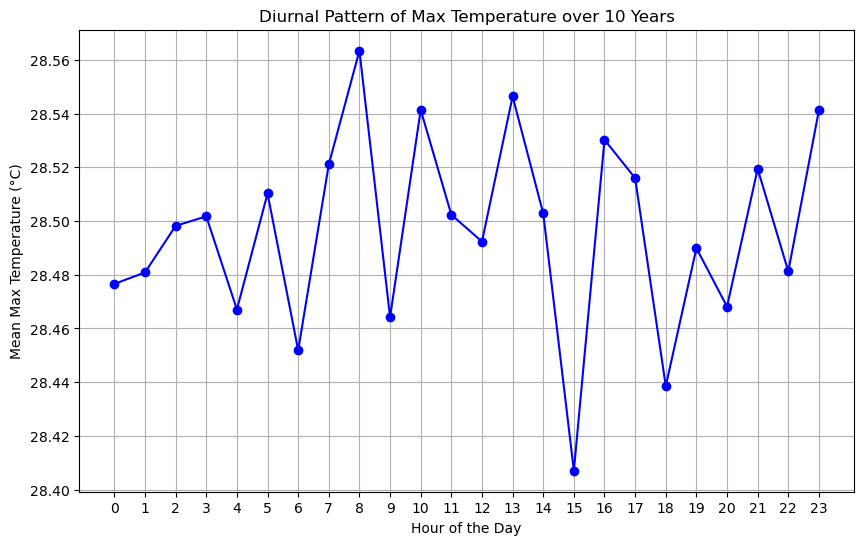

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('weather_konoha_10years.csv')

# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the hour from the 'Datetime' column
df['Hour'] = df['Datetime'].dt.hour

# Group by hour and calculate the mean maximum temperature for each hour
diurnal_data = df.groupby('Hour')['Max_Temperature'].mean()

# Plot the diurnal pattern
plt.figure(figsize=(10, 6))
plt.plot(diurnal_data.index, diurnal_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Max Temperature (°C)')
plt.title('Diurnal Pattern of Max Temperature over 10 Years')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()
